## 線形回帰
### 1. 説明変数が多次元の場合（重回帰）
- モデルパラメータ（重み）：$\mathbf{w} = (w_0, w_1, w_2, \dots, w_p)^{\mathrm{T}} $
- モデルへの入力：$\mathbf{x} = (1, x_1, x_2, \dots, x_p)^{\mathrm{T}} $
- 以上の2つが与えられたときのモデルの出力：$\hat{Y}(\mathbf{x}; \mathbf{w}) =  \mathbf{w}^{\mathrm{T}} \mathbf{x} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_p x_p$

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #3D散布図の描画

### 2. 疑似データの作成
* 実際のデータによく似た疑似データで，説明変数が多次元の場合の線形回帰モデルを構築していきましょう
* 基本的な統計量の確認も行っていきます

今回使用する中古住宅のデータ
* Price : 値段(百万円)
* AreaSize : 土地面積($\mathrm{m}^2$)
* HouseSize : 家面積($\mathrm{m}^2$)
* PassedYear : 経過年数(年)
* Train : 電車での最寄り駅から主要駅までの所要時間(分)
* Walk : 徒歩での最寄り駅から家までの所要時間(分)

In [2]:
df_house = pd.DataFrame({
        "Price":[24.8, 59.5, 7, 7.5, 9.8, 13.5, 14.9, 27, 27, 28, 28.5, 23, 12.9, 18, 23.7, 29.8, 17.8, 5.5, 8.7, 10.3, 14.5, 17.6, 16.8],
        "AreaSize":[98.4, 379.8, 58.6, 61.5, 99.6, 76.2, 115.7, 165.2, 215.2, 157.8, 212.9, 137.8, 87.2, 139.6, 172.6, 151.9, 179.5, 50, 105, 132, 174, 176, 168.7],
        "HouseSize":[74.2, 163.7, 50.5, 58, 66.4, 66.2, 59.6, 98.6, 87.4, 116.9, 96.9, 82.8, 75.1, 77.9, 125, 85.6, 70.1, 48.7, 66.5, 51.9, 82.3, 86.1, 80.8],
        "PassedYear":[4.8, 9.3, 13, 12.8, 14, 6, 14.7, 13.6, 13.3, 6.7, 3.1, 10.3, 11.6, 10.5, 3.8, 5.4, 4.5, 14.6, 13.7, 13, 10.3, 4.4, 12.8],
        "Train":[5, 12, 16, 16, 16, 16, 16, 16, 16, 16, 16, 19, 23, 23, 23, 28, 32, 37, 37, 37, 37, 37, 41],
        "Walk":[6, 12, 2, 1, 5, 1, 4, 2, 7, 6, 5, 20, 8, 3, 5, 4, 2, 3, 11, 6, 18, 10, 2]
    })
df_house.index.name="id"
display(df_house)
df_house.describe()

,AreaSize,HouseSize,PassedYear,Price,Train,Walk
id,,,,,,
0,98.4,74.2,4.8,24.8,5,6
1,379.8,163.7,9.3,59.5,12,12
2,58.6,50.5,13.0,7.0,16,2
3,61.5,58.0,12.8,7.5,16,1
4,99.6,66.4,14.0,9.8,16,5
5,76.2,66.2,6.0,13.5,16,1
6,115.7,59.6,14.7,14.9,16,4
7,165.2,98.6,13.6,27.0,16,2
8,215.2,87.4,13.3,27.0,16,7


,AreaSize,HouseSize,PassedYear,Price,Train,Walk
count,23.000000,23.000000,23.000000,23.000000,23.000000,23.000000
mean,144.139130,81.356522,9.834783,19.395652,23.260870,6.217391
std,70.086095,26.436955,4.023071,11.605151,10.247915,5.062846
min,50.000000,48.700000,3.100000,5.500000,5.000000,1.000000
25%,99.000000,66.300000,5.700000,11.600000,16.000000,2.500000
50%,139.600000,77.900000,10.500000,17.600000,19.000000,5.000000
75%,173.300000,86.750000,13.150000,25.900000,34.500000,7.500000
max,379.800000,163.700000,14.700000,59.500000,41.000000,20.000000


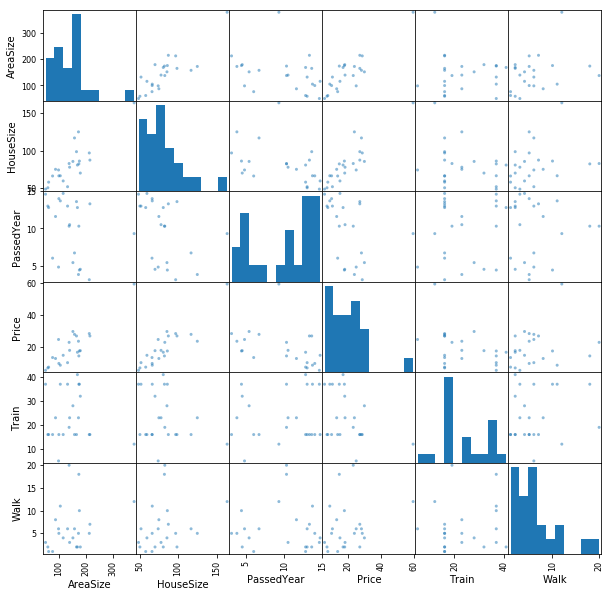

In [3]:
# 散布図行列を書いてみる
pd.plotting.scatter_matrix(df_house, figsize=(10,10))
plt.show()

In [4]:
# 相関係数を確認
df_house.corr()

,AreaSize,HouseSize,PassedYear,Price,Train,Walk
AreaSize,1.000000,0.843471,-0.303278,0.878357,-0.074319,0.336687
HouseSize,0.843471,1.000000,-0.420226,0.896135,-0.276636,0.291113
PassedYear,-0.303278,-0.420226,1.000000,-0.395842,0.124133,-0.020027
Price,0.878357,0.896135,-0.395842,1.000000,-0.400421,0.248661
Train,-0.074319,-0.276636,0.124133,-0.400421,1.000000,0.138155
Walk,0.336687,0.291113,-0.020027,0.248661,0.138155,1.000000


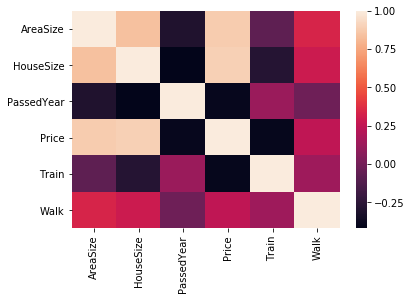

In [5]:
# 相関係数をヒートマップにして可視化
sns.heatmap(df_house.corr())
plt.show()

* 「中古住宅の価格 `Price`」と相関が強い変数は「土地の大きさ `AreaSize`」「家の大きさ `HouseSize`」だということがわかる．
* 「中古住宅の価格 `Price`」と「経過年数 `PassedYear`」は小さな負の相関があることがわかる．
---
* 今回は「土地面積 `AreaSize`」と「主要駅までの所要時間 `Train`」を用いて「中古住宅の価格 `Price`」の説明を試みる．

In [6]:
# 係数を求める
y = df_house["Price"].values
X = df_house[["AreaSize", "Train"]].values
regr = LinearRegression(fit_intercept=True)
regr.fit(X, y)

# 重みを取り出す
w0 = regr.intercept_
w1 = regr.coef_[0]
w2 = regr.coef_[1]

w0 = 7.907, w1 = 0.141, w2 = -0.382, 二乗誤差 = 171.177


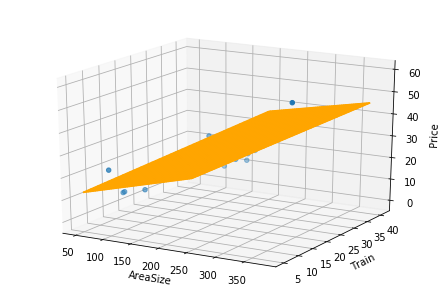

In [9]:
# 変数の設定
x1 = df_house["AreaSize"]
x2 = df_house["Train"]
y = df_house["Price"]

# 重みと二乗誤差の確認
y_est = w0 + w1 * x1 + w2 * x2
squared_error = 0.5 * np.sum((y - y_est) ** 2)
print('w0 = {:.3f}, w1 = {:.3f}, w2 = {:.3f}, 二乗誤差 = {:.3f}'.format(w0, w1, w2, squared_error))

# 作図の設定
fig = plt.figure()
ax = Axes3D(fig)

# 軸の設定
ax.set_xlabel("AreaSize")
ax.set_ylabel("Train")
ax.set_zlabel("Price")

# プロット
ax.scatter3D(x1, x2 ,y)

# 直線のプロット
x1 = np.arange(min(x1), max(x1), (max(x1) - min(x1)) / 100)
x2 = np.arange(min(x2), max(x2), (max(x2) - min(x2)) / 100)
x1, x2 = np.meshgrid(x1, x2)
y_est = w0 + w1 * x1 + w2 * x2
ax.view_init(elev=20)
ax.plot_wireframe(x1, x2, y_est, color="orange")
plt.show()

In [11]:
x1.shape

(100, 100)